In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [2]:
features_df = pd.read_csv("../../../dataset/UCI_HAR/UCI HAR Dataset/features.txt", sep='\s+', header=None, names=['column_index', 'column_name'])

# 피쳐이름에 그룹바이와 cumcount를 적용한 데이터프레임을 만든다
features_cc = features_df.groupby('column_name').cumcount() # (561, )의 시리즈 생성됨
features_cc = pd.DataFrame(features_cc) # (561, 1)의 데이터프레임으로 변환
features_cc.columns = ['cumcount'] # 칼럼명 추가

In [3]:
features_cc = features_cc.reset_index() # (561,2)가 된다.
features_df = features_df.reset_index() # (561,3)이 된다.

# 양쪽 데이터프레임 reset_index()의 결과로 생긴 'index'열을 기준으로 outer join(병합)한다.
# 그럼 결과적으로 index, column_index, column_name, cumcount 4개의 열을 가진 데이터프레임이 생성된다.
new_df = pd.merge(features_cc, features_df, on='index', how='outer')

# 병합에 사용되었던 index 칼럼을 드랍한다.
new_df = new_df.drop(['index'], axis=1) # column_index, column_name, cumcount의 (561,3)이 된다.

# column_name과 cumcount를 합쳐서 하나의 column_name으로 만드는 과정이다
# cumcount가 1이상일경우 column_name 뒤에 _1 또는 _2를 붙인다.
new_df['column_name'] = new_df[['column_name', 'cumcount']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                if x[1]>0 else x[0], axis=1)

# cumcount를 column_name을 새로짓는 데 사용하였으므로 이제 드랍한다.
# 이 작업을 마치면 cumcount 칼럼이 없어져서 (561,2) 데이터프레임이 된다.
new_df = new_df.drop(['cumcount'], axis=1) # column_index, column_name 두개의 (561,2) 가 된다.

h = new_df['column_name'].value_counts()

for i in h:
    if (i == 3):
        print(False)

In [4]:
new_df['column_name'].values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [5]:
X_train = pd.read_csv("../../../dataset/UCI_HAR/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+", names=new_df['column_name'].values)
y_train = pd.read_csv("../../../dataset/UCI_HAR/UCI HAR Dataset/train/y_train.txt", header=None, sep="\s+", names=['activity'])
X_test = pd.read_csv("../../../dataset/UCI_HAR/UCI HAR Dataset/test/X_test.txt", header=None, sep="\s+", names=new_df['column_name'].values)
y_test = pd.read_csv("../../../dataset/UCI_HAR/UCI HAR Dataset/test/y_test.txt", header=None, sep="\s+", names=['activity'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train

,activity
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

scaled_X_train = pd.DataFrame(data = X_train, columns = new_df['column_name'].values)
scaled_X_test = pd.DataFrame(data = X_test, columns = new_df['column_name'].values)
scaled_X_train['label'] = y_train.values
scaled_X_test['label'] = y_test.values

X_train = scaled_X_train
X_test = scaled_X_test

scaled_X_train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",label
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,5
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,5
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,5
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,5
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,5
5,0.038582,0.186180,0.070699,-0.873397,-0.954117,-0.933139,-0.865748,-0.953493,-0.940363,-0.870260,...,-0.742707,-0.713107,0.219586,-0.324856,0.437830,-0.757922,-0.703603,0.424358,0.051552,5
6,0.070680,-0.047671,-0.015559,-0.872474,-0.907757,-0.903754,-0.864275,-0.903852,-0.910339,-0.867538,...,0.279795,0.197889,-0.657546,-0.519341,0.009718,-0.384001,-0.708525,0.415441,0.048386,5
7,0.041908,-0.313491,-0.286403,-0.871668,-0.906847,-0.900094,-0.863055,-0.904297,-0.910015,-0.867538,...,0.700031,0.661908,-0.087811,1.320191,-0.938078,0.990421,-0.706310,0.420848,0.052091,5
8,0.039929,-0.099375,-0.205007,-0.873382,-0.895938,-0.905077,-0.865674,-0.885617,-0.913390,-0.866823,...,0.117163,0.170041,0.012681,0.175674,-0.399562,0.258981,-0.700359,0.438343,0.068615,5
9,0.086790,0.189550,0.054314,-0.867755,-0.918844,-0.911221,-0.860507,-0.919424,-0.916439,-0.865776,...,2.014197,2.489717,-0.086925,-0.289813,-0.808199,-0.135349,-0.700990,0.442807,0.079173,5


In [7]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)  

unique, counts = np.unique(y_test, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T) 

Train data label statistics::
[[   1 1226]
 [   2 1073]
 [   3  986]
 [   4 1286]
 [   5 1374]
 [   6 1407]]
Test data label statistics::
[[  1 496]
 [  2 471]
 [  3 420]
 [  4 491]
 [  5 532]
 [  6 537]]


In [9]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train, y_train = create_dataset(X_train[new_df['column_name'].values], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[new_df['column_name'].values], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

(7351, 1, 561) (7351, 1)


In [10]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [12]:
verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [13]:
# model = keras.Sequential()
# model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train.shape[1], X_train.shape[2]])))
# model.add(Dropout(rate = 0.5))
# model.add(Dense(units = 128, activation = "relu"))
# model.add(Dense(y_train.shape[1], activation = "softmax"))
# model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [14]:
model = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                76032     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 76,230
Trainable params: 76,230
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, epochs = 500, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/500
207/207 [==============================] - 2s 4ms/step - loss: 0.6659 - acc: 0.8047 - val_loss: 0.2510 - val_acc: 0.9470
Epoch 2/500
207/207 [==============================] - 0s 2ms/step - loss: 0.2747 - acc: 0.9276 - val_loss: 0.1333 - val_acc: 0.9592
Epoch 3/500
207/207 [==============================] - 0s 2ms/step - loss: 0.1780 - acc: 0.9542 - val_loss: 0.0862 - val_acc: 0.9701
Epoch 4/500
207/207 [==============================] - 0s 2ms/step - loss: 0.1347 - acc: 0.9639 - val_loss: 0.0723 - val_acc: 0.9728
Epoch 5/500
207/207 [==============================] - 0s 2ms/step - loss: 0.1158 - acc: 0.9646 - val_loss: 0.0756 - val_acc: 0.9688
Epoch 6/500
207/207 [==============================] - 0s 2ms/step - loss: 0.0995 - acc: 0.9689 - val_loss: 0.0723 - val_acc: 0.9647
Epoch 7/500
207/207 [==============================] - 0s 2ms/step - loss: 0.0857 - acc: 0.9740 - val_loss: 0.0834 - val_acc: 0.9647
Epoch 8/500
207/207 [==============================] - 0s 2ms/step - 

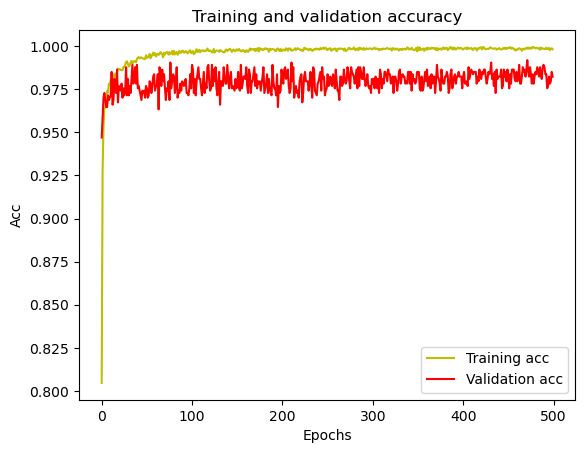

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

acc = history.history['acc']
val_acc = history.history['val_acc']

x = np.arange(0, 500)
plt.plot(x, acc, 'y', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(X_test)

93/93 [==============================] - 1s 892us/step


In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

93/93 [==============================] - 0s 783us/step
Confusion Matrix
[[452   7  36   1   0   0]
 [  1 467   1   1   0   0]
 [  2  18 400   0   0   0]
 [  0   2   0 436  52   1]
 [  0   0   0  32 500   0]
 [  0   0   0   0   0 537]]


In [20]:
score = model.evaluate(X_test, y_test)

pd.DataFrame(score)

93/93 [==============================] - 0s 994us/step - loss: 0.6593 - acc: 0.9477


,0
0,0.659272
1,0.947726
